Doğruluk Oranı:  0.5101959216313474
Confusion Matrix:
[[2552    0    0    0    0    0    0    0]
 [2075    0    0    0    0    0    0    0]
 [ 230    0    0    0    0    0    0    0]
 [ 101    0    0    0    0    0    0    0]
 [  22    0    0    0    0    0    0    0]
 [   9    0    0    0    0    0    0    0]
 [  12    0    0    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.68      2552
           1       0.00      0.00      0.00      2075
           2       0.00      0.00      0.00       230
           3       0.00      0.00      0.00       101
           4       0.00      0.00      0.00        22
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00        12
           7       0.00      0.00      0.00         1

    accuracy                           0.51      5002
   macro avg       0.06      0.12   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

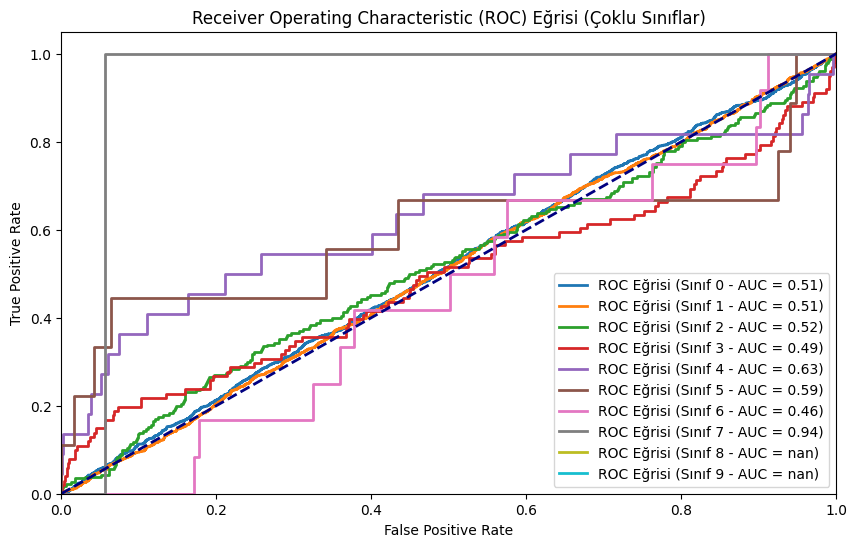

In [21]:
# Gerekli kütüphaneleri içe aktar
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize

# Veri seti sütunlarını tanımla (veri setinde sütun isimleri yok, biz manuel ekliyoruz)
columns = [
    'S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'class'
]

# Veri setini UCI URL’sinden yükle
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data"
df = pd.read_csv(url, header=None, names=columns)

# Girdi ve hedef değişkenleri ayır
X = df.drop("class", axis=1)  # Özellikler (S1, C1, ...)
y = df["class"]  # Hedef (class)

# Eğitim ve test verilerini ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi ölçeklendir (Logistic Regression için)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression modelini oluştur ve eğit
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Test verisiyle tahmin yap
y_pred = model.predict(X_test_scaled)

# Doğruluk, Confusion Matrix ve Classification Report
print("Doğruluk Oranı: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Çoklu sınıflı ROC eğrisini çizmek için probabilite tahminleri al
y_proba = model.predict_proba(X_test_scaled)  # Her sınıf için olasılıkları al

# Hedef değişkeni binarize et (her sınıf için ayrı bir sütun)
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# ROC eğrisini çizmek için her sınıf için ROC hesapla
fpr = {}
tpr = {}
roc_auc = {}

n_classes = len(np.unique(y))

plt.figure(figsize=(10, 6))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC Eğrisi (Sınıf {i} - AUC = {roc_auc[i]:.2f})')

# Rastgele tahmin çizgisi
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Eğrisi (Çoklu Sınıflar)')
plt.legend(loc='lower right')
plt.show()


Fitting 5 folds for each of 10 candidates, totalling 50 fits
En iyi parametreler: {'C': 0.01, 'max_iter': 1000, 'solver': 'saga'}
Doğruluk Oranı:  0.5101959216313474
Confusion Matrix:
[[2552    0    0    0    0    0    0    0]
 [2075    0    0    0    0    0    0    0]
 [ 230    0    0    0    0    0    0    0]
 [ 101    0    0    0    0    0    0    0]
 [  22    0    0    0    0    0    0    0]
 [   9    0    0    0    0    0    0    0]
 [  12    0    0    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.68      2552
           1       0.00      0.00      0.00      2075
           2       0.00      0.00      0.00       230
           3       0.00      0.00      0.00       101
           4       0.00      0.00      0.00        22
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00        12
           7   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

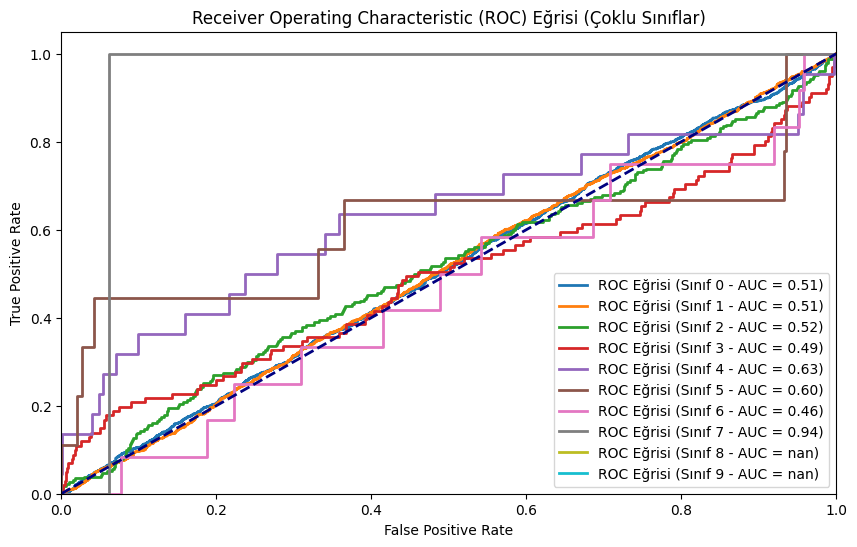

In [31]:
# Gerekli kütüphaneleri içe aktar
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Veri seti sütunlarını tanımla (veri setinde sütun isimleri yok, biz manuel ekliyoruz)
columns = [
    'S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'class'
]

# Veri setini UCI URL’sinden yükle
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data"
df = pd.read_csv(url, header=None, names=columns)

# Girdi ve hedef değişkenleri ayır
X = df.drop("class", axis=1)  # Özellikler (S1, C1, ...)
y = df["class"]  # Hedef (class)

# Eğitim ve test verilerini ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi ölçeklendir (Logistic Regression için)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression için parametre gridi
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Düzenleme parametresi
    'solver': ['liblinear', 'saga'],  # Çeşitli çözümleyiciler
    'max_iter': [1000]  # Iterasyon sayısı
}

# GridSearchCV ile en iyi parametreyi bulma
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

# En iyi parametreyi yazdır
print("En iyi parametreler:", grid_search.best_params_)

# En iyi modeli kullanarak tahminler yap
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Doğruluk, Confusion Matrix ve Classification Report
print("Doğruluk Oranı: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Çoklu sınıflı ROC eğrisini çizmek için probabilite tahminleri al
y_proba = best_model.predict_proba(X_test_scaled)  # Her sınıf için olasılıkları al

# Hedef değişkeni binarize et (her sınıf için ayrı bir sütun)
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# ROC eğrisini çizmek için her sınıf için ROC hesapla
fpr = {}
tpr = {}
roc_auc = {}

n_classes = len(np.unique(y))

plt.figure(figsize=(10, 6))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC Eğrisi (Sınıf {i} - AUC = {roc_auc[i]:.2f})')

# Rastgele tahmin çizgisi
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Eğrisi (Çoklu Sınıflar)')
plt.legend(loc='lower right')
plt.show()
